In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('pandas={}'.format(pd.__version__))
print('numpy={}'.format(np.__version__))

pandas=1.0.3
numpy=1.18.4


In [2]:
# Create Dataframe from JHU GitHub CSV file

def load_data(name="confirmed"):
    base_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
    url = f'{base_url}/time_series_covid19_{name}_global.csv'
    df = pd.read_csv(url, index_col=['Country/Region'])
    df = df.drop(columns=['Lat','Long','Province/State'])
    
    return df

In [3]:
# Load COVID Data for Deaths, Confirmed and Recovered

df_deaths = load_data("deaths")
df_confirmed = load_data("confirmed")
df_recovered = load_data("recovered")

# df_confirmed.tail(20)

In [4]:
# Group by Country and Sum Data

df_deaths = df_deaths.groupby('Country/Region').sum()
df_confirmed = df_confirmed.groupby('Country/Region').sum()
df_recovered = df_recovered.groupby('Country/Region').sum()

df_confirmed.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054
Albania,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197
Algeria,0,0,0,0,0,0,0,0,0,0,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831
Andorra,0,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852
Angola,0,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,26,26,26,26,26
Argentina,0,0,0,0,0,0,0,0,0,0,...,13228,13933,14702,15419,16214,16851,17415,18319,19268,20197
Armenia,0,0,0,0,0,0,0,0,0,0,...,7402,7774,8216,8676,8927,9282,9492,10009,10524,11221
Australia,0,0,0,0,4,5,5,6,9,9,...,7139,7150,7165,7184,7192,7202,7221,7229,7240,7247


In [5]:
# Create Regional Clusters

def create_region_data(df):

    european_union = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia',
                      'Denmark','Estonia','Finland','France','Germany','Greece',
                      'Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg',
                      'Malta','Netherlands','Poland','Portugal','Romania',
                      'Slovakia','Slovenia','Spain','Sweden']
    north_america  = ['Canada','Mexico','US']
    latin_america  = ['Argentina','Bolivia','Brazil','Chile','Ecuador',
                      'Paraguay','Peru','Suriname','Uruguay','Venezuela',
                      'Belize','Costa Rica','El Salvador','Guatemala','Honduras',
                      'Mexico','Nicaragua','Panama'] # TODO: Fix problem with 'Columbia' data
    canzuk         = ['Canada','Australia','New Zealand','United Kingdom']
    south_asia     = ['Bangladesh','Bhutan','India','Indonesia','Maldives','Nepal','Sri Lanka','Thailand','Timor-Leste']
    west_pac       = ['Australia','Brunei','Korea, South','Japan','New Zealand','Philippines','Singapore']

    cdata_eu = df.loc[european_union, df.columns[3:]].astype(int).sum(axis=0)
    cdata_na = df.loc[north_america, df.columns[3:]].astype(int).sum(axis=0)
    cdata_la = df.loc[latin_america, df.columns[3:]].astype(int).sum(axis=0)
    cdata_cw = df.loc[canzuk, df.columns[3:]].astype(int).sum(axis=0)
    cdata_sa = df.loc[south_asia, df.columns[3:]].astype(int).sum(axis=0)
    cdata_ap = df.loc[west_pac, df.columns[3:]].astype(int).sum(axis=0)
    cdata_cn = df.loc[["China"], df.columns[3:]].astype(int).sum(axis=0)

    cdata_regions = pd.concat([cdata_eu, cdata_na, cdata_la, cdata_cw, cdata_sa, cdata_ap, cdata_cn], axis=1)
    cdata_regions.rename(columns={0:"EU",1:"North America",2:"Latin America",3:"CANZUK",4:"South Asia",5:"Pacific",6:"China"}, inplace=True)
    #cdata_regions.tail(10)
    
    return cdata_regions

In [6]:
# Create Regional Clusters

region_deaths = create_region_data(df_deaths)
region_confirmed = create_region_data(df_confirmed)
region_recovered = create_region_data(df_recovered)

region_confirmed.tail(10)

,EU,North America,Latin America,CANZUK,South Asia,Pacific,China
5/26/20,1133046,1843563,757678,363332,217334,83684,84103
5/27/20,1136303,1866188,795169,366262,227147,84715,84106
5/28/20,1144772,1893129,838170,369153,237450,85647,84106
5/29/20,1149529,1921555,880519,372204,249043,87437,84123
5/30/20,1154701,1949358,931186,374596,260035,88611,84128
5/31/20,1157459,1973315,967052,377341,272361,90071,84146
6/1/20,1159772,1997743,994627,379749,283276,91124,84154
6/2/20,1161503,2023106,1034972,382084,295962,92134,84161
6/3/20,1169782,2047399,1084649,384655,309251,93534,84160
6/4/20,1170429,2073609,1131795,387099,322569,94775,84171


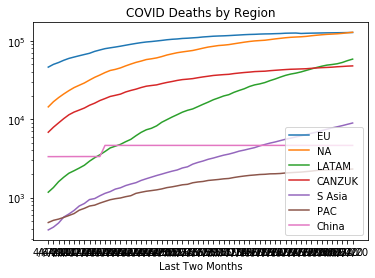

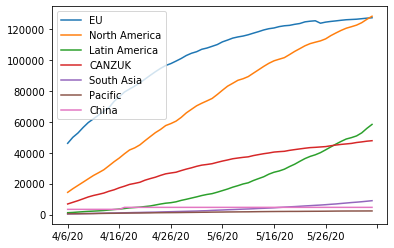

In [7]:
# plot the number of Deaths

plt.semilogy(region_deaths.tail(60))
plt.legend(["EU","NA","LATAM","CANZUK","S Asia","PAC","China"])
plt.title("COVID Deaths by Region")
plt.xlabel('Last Two Months')
plt.show()

region_deaths.tail(60).plot()

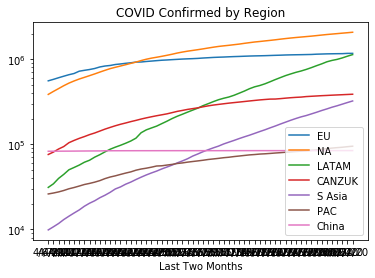

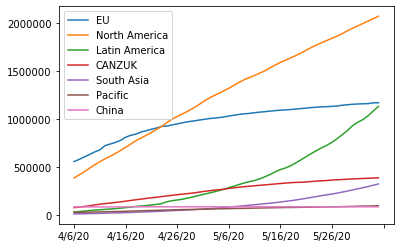

In [8]:
# plot the number of Confirmed

plt.semilogy(region_confirmed.tail(60))
plt.legend(["EU","NA","LATAM","CANZUK","S Asia","PAC","China"])
plt.title("COVID Confirmed by Region")
plt.xlabel('Last Two Months')
plt.show()

region_confirmed.tail(60).plot()

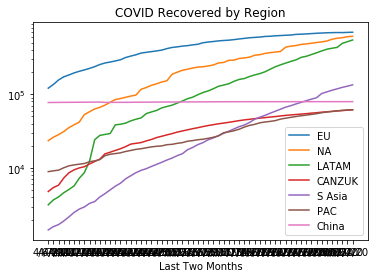

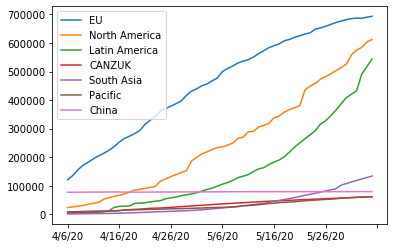

In [9]:
# plot the number of Recovered

plt.semilogy(region_recovered.tail(60))
plt.legend(["EU","NA","LATAM","CANZUK","S Asia","PAC","China"])
plt.title("COVID Recovered by Region")
plt.xlabel('Last Two Months')
plt.show()

region_recovered.tail(60).plot()